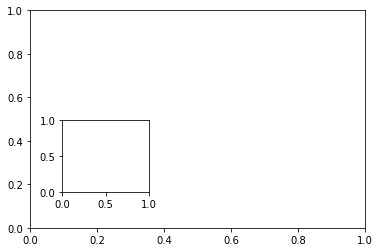

In [2]:
import matplotlib.pyplot as plt
axe_1 = plt.axes()
axe_2 = plt.axes([0.2,0.25,0.2,0.25])

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [50]:
# text mining
movies_metadata = pd.read_csv('/content/drive/MyDrive/Data cinéma/movies_metadata.csv',low_memory=False,usecols=['title','imdb_id','release_date','popularity','vote_average','vote_count','overview','genres','belongs_to_collection'])
m  = movies_metadata['vote_count'].quantile(0.6)
movies_metadata = movies_metadata.copy()[movies_metadata['vote_count'] >= m]
movies_metadata = movies_metadata.drop_duplicates()
# filtre les films qui n'ont pas de résumé
movies_metadata_filtre=movies_metadata[~movies_metadata['overview'].isna()]
print("On perd",len(movies_metadata)-len(movies_metadata_filtre),"films sur",len(movies_metadata))
movies_metadata_filtre.index = range(len(movies_metadata_filtre))

On perd 130 films sur 18517


,belongs_to_collection,genres,imdb_id,overview,popularity,release_date,title,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,Toy Story,7.7,5415.0
1,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",tt0113497,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,Jumanji,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",tt0113228,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,Grumpier Old Men,6.5,92.0
3,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0114885,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,Waiting to Exhale,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...","[{'id': 35, 'name': 'Comedy'}]",tt0113041,Just when George Banks has recovered from his ...,8.387519,1995-02-10,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...
18382,NaN,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",tt6969946,A closeted boy runs the risk of being outed by...,20.82178,2017-06-01,In a Heartbeat,8.3,146.0
18383,NaN,"[{'id': 35, 'name': 'Comedy'}]",tt0294425,Hyperactive teenager Kelly is enrolled into a ...,4.392389,2002-03-07,Cadet Kelly,5.2,145.0
18384,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",tt0000359,A chemist in his laboratory places upon a tabl...,1.618458,1901-01-01,The Man with the Rubber Head,7.6,29.0
18385,NaN,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",tt0135453,A band-leader has arranged seven chairs for th...,1.109068,1900-01-01,The One-Man Band,6.5,22.0


In [51]:
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

tokenizer = nltk.RegexpTokenizer(r'\w+')
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()
tfidf = TfidfVectorizer(stop_words='english')

def tokenize_mot_vide_lemm(a):
  # Etape 1 : tokenize
  Sac_de_mots=tokenizer.tokenize(a)
  # Etape 2 : suppression des mots vides et Etape 3 : lemmatizer
  F2 = [lemmatizer.lemmatize(x) for x in Sac_de_mots if x not in stopwords]
  return (" ".join(F2))

base_toke_vide_lemm = [tokenize_mot_vide_lemm(x) for x in movies_metadata_filtre['overview']]
tfidf_matrix = tfidf.fit_transform(base_toke_vide_lemm)
tfidf_matrix.shape

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(18387, 40472)

In [6]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
# tfidf = TfidfVectorizer(stop_words='english')
# tfidf_matrix = tfidf.fit_transform(movies_metadata_filtre['overview'])
# tfidf_matrix.shape


In [52]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(movies_metadata_filtre.index, index=movies_metadata_filtre['title']).drop_duplicates()

title
Toy Story                                           0
Jumanji                                             1
Grumpier Old Men                                    2
Waiting to Exhale                                   3
Father of the Bride Part II                         4
                                                   ..
Chungking Express                                  95
The Star Maker                                     96
Flirting with Disaster                             97
The Neverending Story III: Escape from Fantasia    98
Jade                                               99
Length: 100, dtype: int64

In [81]:
def get_recommendations(title):
    idx = indices[title]
    df = cosine_sim[idx]
    if len(df) < len(indices):
      df = np.mean(df, axis=0)
    sim_scores = list(enumerate(df))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[0:(10+len(idx))]
    movie_indices = [i[0] for i in sim_scores if i[0] not in list(idx)]
    # Return the top 10 most similar movies
    return movies_metadata_filtre[['title','release_date','vote_average','vote_count']].iloc[movie_indices]

In [82]:
get_recommendations(['The Dark Knight Rises'])

,title,release_date,vote_average,vote_count
8487,The Dark Knight,2008-07-16,8.3,12269.0
111,Batman Forever,1995-06-16,5.2,1529.0
963,Batman Returns,1992-06-19,6.6,1706.0
9998,Batman: Under the Red Hood,2010-07-27,7.6,459.0
446,Batman,1989-06-23,7.0,2145.0
6408,Batman Beyond: Return of the Joker,2000-12-12,7.5,152.0
12123,Batman Unmasked: The Psychology of the Dark Kn...,2008-07-15,8.0,17.0
11601,"Batman: The Dark Knight Returns, Part 1",2012-09-06,7.7,410.0
10857,Batman: Year One,2011-09-27,7.1,255.0
4355,Q & A,1990-04-27,6.6,22.0


In [78]:
get_recommendations(['The Dark Knight Rises','Batman'])

6408                    Batman Beyond: Return of the Joker
9998                            Batman: Under the Red Hood
111                                         Batman Forever
8487                                       The Dark Knight
12213                      Batman: Mystery of the Batwoman
963                                         Batman Returns
1065                                        Batman & Robin
13642                                    Batman vs Dracula
12123    Batman Unmasked: The Psychology of the Dark Kn...
10857                                     Batman: Year One
Name: title, dtype: object

In [141]:
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

tokenizer = nltk.RegexpTokenizer(r'\w+')
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def test_1():
  Sac_de_mots=tokenizer.tokenize(a)
  F1=[]
  for i in Sac_de_mots:
    if i not in stopwords:
      F1.append(lemmatizer.lemmatize(i))
  return (F1)

def test_2():
  Sac_de_mots=tokenizer.tokenize(a)
  F2 = [lemmatizer.lemmatize(x) for x in Sac_de_mots if x not in stopwords]
  return (F2)

F1 = test_1()
F2 = test_2()

print(F1)
print(F2)

#import timeit

#print(timeit.timeit("test_1()",setup="from __main__ import test_1",number=10000))
#print(timeit.timeit("test_2()",setup="from __main__ import test_2",number=10000))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['Babe', 'little', 'pig', 'quite', 'know', 'place', 'world', 'With', 'bunch', 'odd', 'friend', 'like', 'Ferdinand', 'duck', 'think', 'rooster', 'Fly', 'dog', 'call', 'mom', 'Babe', 'realizes', 'making', 'become', 'greatest', 'sheep', 'pig', 'time', 'Farmer', 'Hogget', 'know', 'With', 'help', 'sheep', 'dog', 'Babe', 'learns', 'pig', 'anything', 'want']
['Babe', 'little', 'pig', 'quite', 'know', 'place', 'world', 'With', 'bunch', 'odd', 'friend', 'like', 'Ferdinand', 'duck', 'think', 'rooster', 'Fly', 'dog', 'call', 'mom', 'Babe', 'realizes', 'making', 'become', 'greatest', 'sheep', 'pig', 'time', 'Farmer', 'Hogget', 'know', 'With', 'help', 'sheep',